In [2]:
import pandas as pd
import geopandas as gpd
import folium

import warnings
warnings.filterwarnings('ignore')

In [3]:
life_expectancy = pd.read_csv('data/life-expectancy-vs-healthcare-expenditure.csv')
life_expectancy.head()

,Entity,Code,Year,"Total population (Gapminder, HYDE & UN)",Continent,"Health expenditure per capita, PPP (constant 2011 international $)","Life expectancy at birth, total (years)"
0,Abkhazia,OWID_ABK,2015,NaN,Asia,NaN,NaN
1,Afghanistan,AFG,1800,3280000.0,NaN,NaN,NaN
2,Afghanistan,AFG,1801,3280000.0,NaN,NaN,NaN
3,Afghanistan,AFG,1802,3280000.0,NaN,NaN,NaN
4,Afghanistan,AFG,1803,3280000.0,NaN,NaN,NaN


In [15]:
# Data Clean up

# 1. Rename Columns!
life_expectancy.rename(columns={'Total population (Gapminder, HYDE & UN)': 'Population',
                                'Health expenditure per capita, PPP (constant 2011 international $)': 'expenditure',
                                'Life expectancy at birth, total (years)': 'expectancy'}, inplace=True)

# 2. No null values in expenditure or expectancy
life_expectancy = life_expectancy[(life_expectancy['expenditure'].notna()) & (life_expectancy['expectancy'].notna())
                                 & (life_expectancy['Population'].notna())]

# 3. No Nan values in Code. Remove those
life_expectancy = life_expectancy[life_expectancy['Code'].notna()]
life_expectancy.head()

,Entity,Code,Year,Population,Continent,expenditure,expectancy,total_expenditure
203,Afghanistan,AFG,2002,22601000.0,NaN,75.983514,56.637,1.717303
204,Afghanistan,AFG,2003,23681000.0,NaN,89.440178,57.250,2.118033
205,Afghanistan,AFG,2004,24727000.0,NaN,87.520903,57.875,2.164129
206,Afghanistan,AFG,2005,25654000.0,NaN,88.323062,58.500,2.265840
207,Afghanistan,AFG,2006,26433000.0,NaN,86.856016,59.110,2.295865


In [16]:
# Calculate total expenditure
life_expectancy['total_expenditure'] = life_expectancy['Population'] * life_expectancy['expenditure'] / 1e9  # In Billion $
life_expectancy.head()

,Entity,Code,Year,Population,Continent,expenditure,expectancy,total_expenditure
203,Afghanistan,AFG,2002,22601000.0,NaN,75.983514,56.637,1.717303
204,Afghanistan,AFG,2003,23681000.0,NaN,89.440178,57.250,2.118033
205,Afghanistan,AFG,2004,24727000.0,NaN,87.520903,57.875,2.164129
206,Afghanistan,AFG,2005,25654000.0,NaN,88.323062,58.500,2.265840
207,Afghanistan,AFG,2006,26433000.0,NaN,86.856016,59.110,2.295865


In [17]:
# Find year common to all countries
life_expectancy.Year.value_counts()

2012    182
2013    181
2005    181
2002    181
2014    181
2003    180
2011    180
2007    180
2010    180
2008    180
2006    180
2004    180
2009    180
2000    180
2001    178
1997    177
1999    176
1995    175
1998    175
1996    174
Name: Year, dtype: int64

### TASK 1 : Plot expenditure vs expectancy in year 2012

In [18]:
plot_data = life_expectancy[life_expectancy['Year'] == 2012]

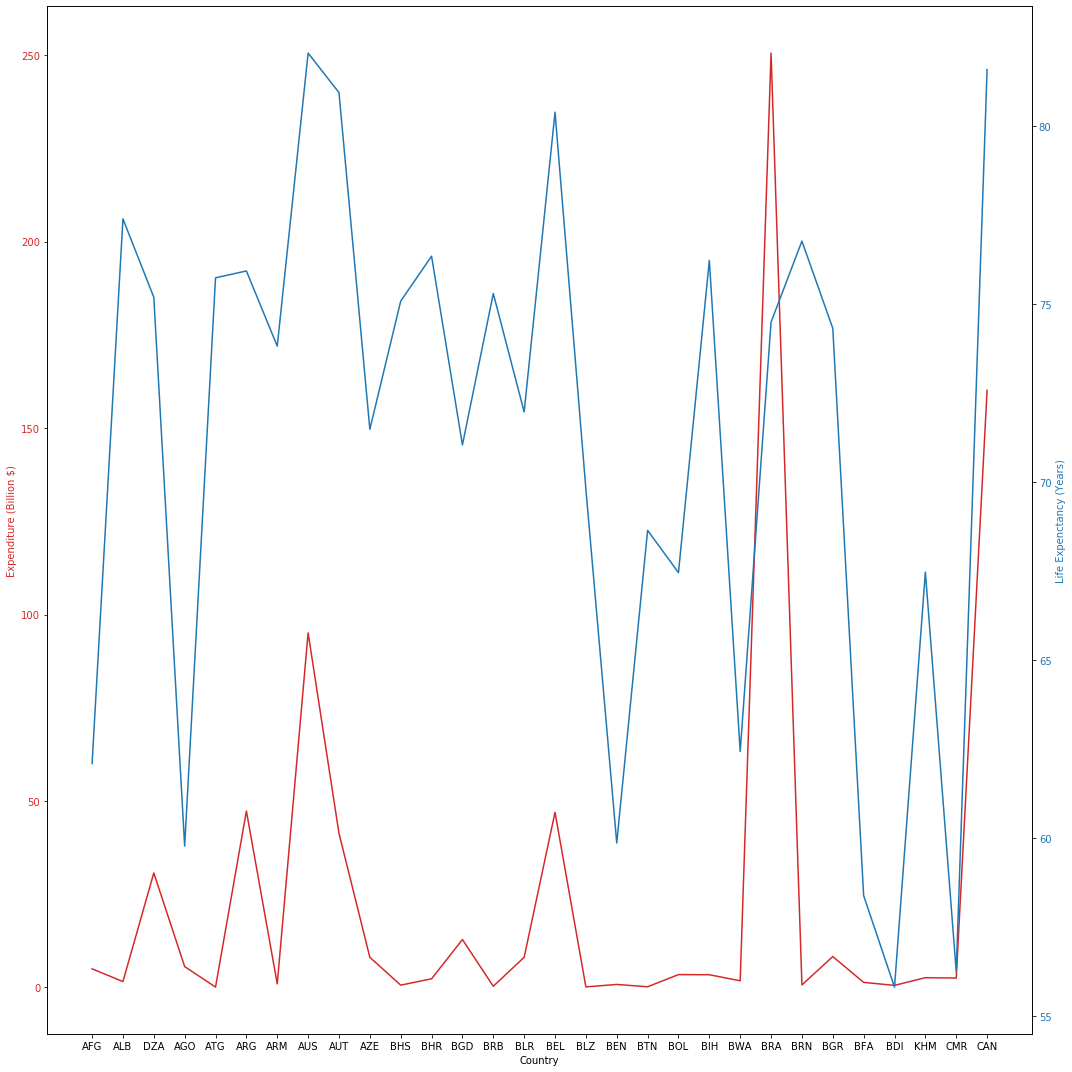

In [22]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(15, 15))
color = 'tab:red'
ax1.set_xlabel('Country')
ax1.set_ylabel('Expenditure (Billion $)', color=color)
ax1.plot(plot_data['Code'][0:30], plot_data['total_expenditure'][0:30], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Life Expenctancy (Years)', color=color)  # we already handled the x-label with ax1
ax2.plot(plot_data['Code'][0:30], plot_data['expectancy'][0:30], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

fig.savefig('health_expenditure-vs-Life-Expectancy.png')

In [14]:
plot_data[plot_data['Code'].isna()]

,Entity,Code,Year,Population,Continent,expenditure,expectancy,total_expenditure
32177,North America,NaN,2012,349092992.0,NaN,8370.831921,79.025152,2922.198761


In [21]:
plot_data.head()

,Entity,Code,Year,Population,Continent,expenditure,expectancy,total_expenditure
213,Afghanistan,AFG,2012,31161000.0,NaN,160.368027,62.086,4.997228
556,Albania,ALB,2012,2914000.0,NaN,544.006172,77.389,1.585234
776,Algeria,DZA,2012,37384000.0,NaN,821.338885,75.187,30.704933
1286,Angola,AGO,2012,25108000.0,NaN,223.244529,59.770,5.605224
1577,Antigua and Barbuda,ATG,2012,90000.0,NaN,1128.176372,75.733,0.101536
